Linear regression one dimension

In [63]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

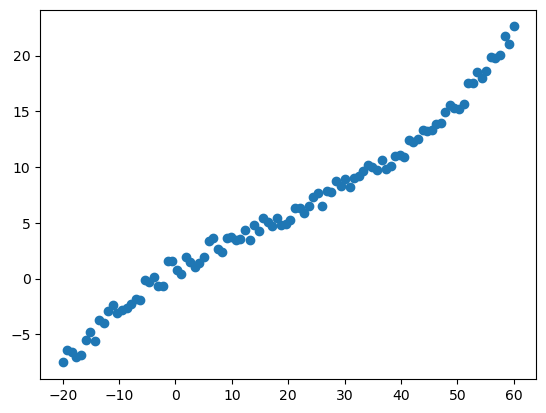

In [64]:
with open('./measurements.csv', 'r') as f:
    csvreader = csv.reader(f, delimiter=',')
    data = [row for row in csvreader]
    data = np.array(data, dtype=np.float32)
x = data[:,0]
y = data[:,1]

x1 = data[:,0]
y1 = data[:,1]


plt.scatter(x1,y1)

In [ ]:
def h_fun1(x, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: ndarray o wymiarze takim samym jak x, który zawiera wartości f. regresji liniowej dla podanych wag
    '''
    return theta_0 + x*theta_1

def calculate_cost1(x, y, theta_0, theta_1):
    '''
    :param x: ndarray o wymiarze ilości przykładów
    :param y: ndarray z wartościami referencyjnymi o wymiarze takim jak x
    :param theta_0: parametr wolny modelu regresji liniowej jednej zmiennej
    :param theta_1: parametr przy xi modelu regresji liniowej jednej zmiennej
    :return: wartość funkcji kosztu dla podanych paramterów modelu
    '''
    return np.sum(np.square(h_fun1(x,theta_0,theta_1) - y)) / (2*y.shape[0])


eps = 1e-5  # akceptowalna różnica dla kolejnych wartości funkcji kosztu 
alpha = 0.001  # learning rate
theta_0 = 0  # - wartości początkowe parametrów modelu
theta_1 = 0

def linear_regression_one_dim(x, y, eps, alpha, theta_0, theta_1):

    cost = calculate_cost1(x, y, theta_0, theta_1)

    while True:
        h_diff = h_fun1(x,theta_0,theta_1)

        d_theta0 = (1/y.shape[0]) * np.sum(h_diff-y)
        d_theta1 = (1/y.shape[0]) * np.sum((h_diff-y)*x)

        theta_0 -= alpha*d_theta0
        theta_1 -= alpha*d_theta1
        previous_cost, cost = cost, calculate_cost1(x,y,theta_0,theta_1)

        if previous_cost - cost < eps:
            break
    return theta_0, theta_1, cost

Funkcja regresji wygląda następująco:
0.3154x + 0.0065
Koszt regresji wynosi J = 0.6392


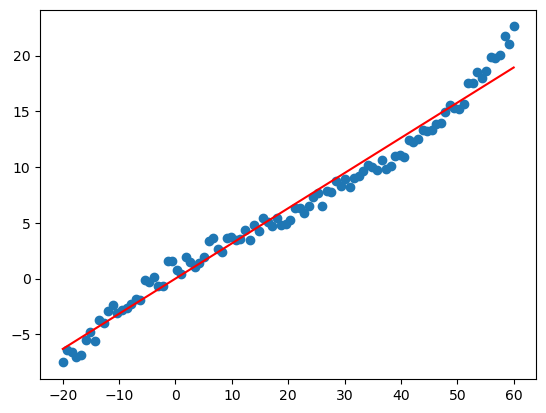

In [66]:
theta_0, theta_1, cost = linear_regression_one_dim(x1,y1,eps,alpha, theta_0, theta_1)

print(f'Funkcja regresji wygląda następująco:\n{theta_1:.4f}x + {theta_0:.4f}')
print(f'Koszt regresji wynosi J = {cost:.4f}')

plt.scatter(x1,y1)
plt.plot(x1,h_fun1(x1,theta_0,theta_1),'r')

Linear regression high dimension

In [85]:
X2 = np.vstack([np.ones(x.shape),x])
y2 = y
y2.shape = [1,-1]

def h_fun2(X, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: 
    '''
    return theta.T @ X

def calculate_cost2(X, y, theta):
    '''
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :return: wartość f. kosztu
    '''
    y_predicted = h_fun2(X, theta)
    return np.sum(np.square(y_predicted-y)) / (2 * y.shape[1])


def linear_regression_high_dim(X,y,eps,alpha):
    n, m = X.shape
    theta = np.zeros((n, 1))
    cost = calculate_cost2(X,y,theta)

    while True:
        h_y_diff = h_fun2(X,theta) - y
        gradient = h_y_diff @ X.T
        theta = theta - alpha * gradient.T / m

        previous_cost,  cost = cost, calculate_cost2(X,y, theta)
        if previous_cost - cost < eps:
            break
    return theta

In [88]:
theta = np.array([[0], [0]])

theta2 = linear_regression_high_dim(X2,y2,eps,alpha)
cost2 = calculate_cost2(X2,y2,theta2)
print(f'Funkcja regresji wygląda następująco:\n{theta2[1,0]:.4f}x + {theta2[0,0]:.4f}')
print(f'Koszt regresji wynosi J = {cost2:.4f}')


Funkcja regresji wygląda następująco:
0.3154x + 0.0065
Koszt regresji wynosi J = 0.6392


Regresja wielu zmeinnych na pliku housing.txt

In [92]:
with open('housing.txt','r') as f2:
    csvreader2 = csv.reader(f2, delimiter=',')
    data2 = [row for row in csvreader2]
    data2 = np.array(data2,dtype=np.float32)
    y3 = data2[:,2]
    y3.shape = [1,y3.shape[0]]
    X3 = data2[:,0:2]
    X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1).T

y3_scale = y3.max()
y3 = y3 / y3_scale

X3_scale = X3.max(axis=1)
X3_scale.shape = [-1,1]
X3 = X3/ X3_scale

theta3 = linear_regression_high_dim(X3,y3, eps, alpha)

example = np.array([[1], [1300], [4]])
h_example = theta3.T @ (example/X3_scale) * y3_scale
print(f'Koszt nieruchomosi o pow. {example[1][0]} z l. pok. {example[2][0]} oszacowany na {h_example[0][0]}')


Koszt nieruchomosi o pow. 1300 z l. pok. 4 oszacowany na 296090.6397107442


Regresja wielomianowa

In [106]:
X4 = np.vstack([np.ones(x.shape), x, x**2, x**3])
y4 = y
X4_scale = X4.max(axis=1)
X4_scale.shape = [-1, 1]
X4 = X4 / X4_scale
 
y4.shape = [1, -1]
y4_scale = y4.max()
y4 = y4 / y4_scale

In [97]:
eps = 1e-10
alpha = 1e-3
theta = np.array([[0], [0], [0], [0]])

theta4 = linear_regression_high_dim(X4,y4,eps,alpha)
print(theta4)


[[ 0.02528658]
 [ 0.77921902]
 [-0.49718083]
 [ 0.65075679]]


[[0]
 [0]
 [0]
 [0]]


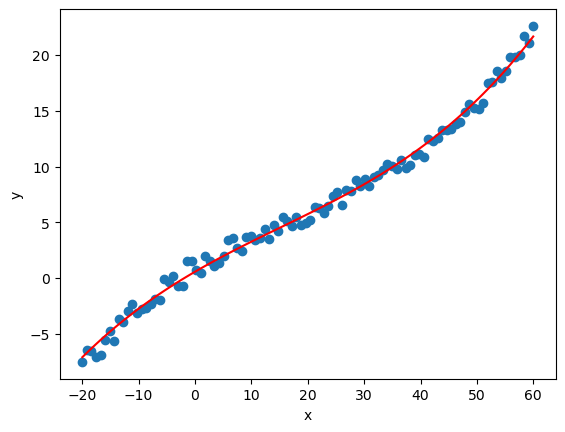

In [105]:
y_pred = theta4.T @ X4 * y4_scale

print(theta)

plt.scatter(x,y)
plt.plot(x,y_pred.T,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()